# Prisoner's Dilemma

In [1]:
from games.game import SymmetricNPlayerGame
from wrapper import GameDynamicsWrapper
from wrapper import VariedGame
from dynamics.replicator import Replicator
from dynamics.wright_fisher import WrightFisher
from dynamics.moran import Moran
%matplotlib inline

In [2]:
class PD(SymmetricNPlayerGame):
    DEFAULT_PARAMS = dict(R=3,S=0,T=5,P=1,bias_strength=0.0,bias_scale=0)
    STRATEGY_LABELS = ('Cooperate', 'Defect')
    EQUILIBRIA_LABELS = ('Cooperation','Defection')
    def __init__(self,R,S,T,P,bias_strength,bias_scale):
        payoff_matrix = ((R,S),(T,P))
        super(PD, self).__init__(payoff_matrix,1,bias_strength,bias_scale)
        
    @classmethod
    def classify(cls, params, state, tolerance):
        
        tolerance = 0.1
        threshold = 1 - tolerance
            
        if state[0][0] >= threshold:
            return 0#C 
        elif state[0][1] >= threshold:
            return 1#D 
        else:
            return super(PD, cls).classify(params, state, tolerance)

## Example Simulations
### Basic simulations
### Replicator

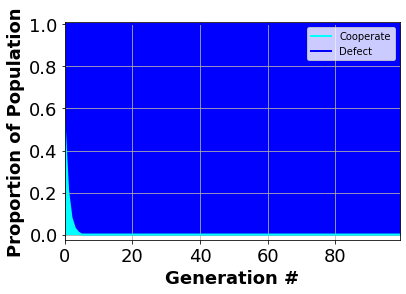

In [3]:
s = GameDynamicsWrapper(PD,Replicator)
s.simulate(num_gens=100,pop_size=100,graph=dict(area=True,options=['smallfont']))

### Moran
Can also define a start state

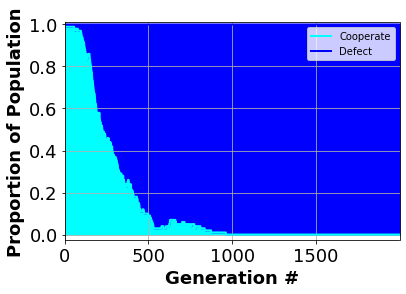

In [2]:
s = GameDynamicsWrapper(PD,Moran)
s.simulate(num_gens=2000,pop_size=100,start_state=[[[99,1]]],graph=dict(area=True,options=['smallfont']))

### Running many iterations of a simulation

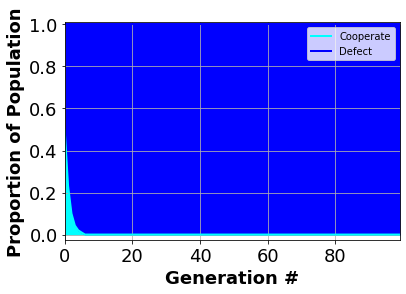

{'Defection': 1.0}

In [3]:
s = GameDynamicsWrapper(PD,WrightFisher)
s.simulate_many(num_iterations=100,num_gens=100,class_end=True,graph=dict(area=True,options=['smallfont']))

### Fraction of invasions

In [4]:
s = GameDynamicsWrapper(PD,Moran)
s.frac_invasions(num_iterations = 1000, num_gens = 2000, pop_size = 100, strategy_indx = 1)

'Fraction of runs where the required strategy dominated the population = 0.79'

### Histogram of final population sizes

{'Defection': 0.73, 'Unclassified': 0.27}

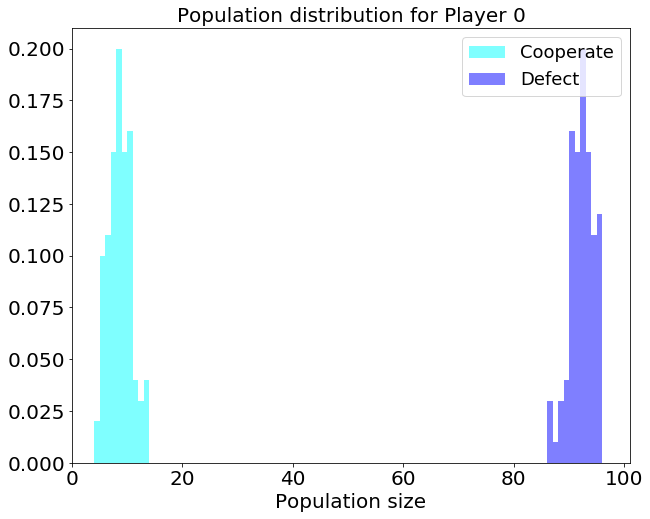

In [6]:
s = GameDynamicsWrapper(PD,WrightFisher,dynamics_kwargs={'mu':[[0.1,0.1]]})
s.simulate_many(num_iterations=100,num_gens=100,histogram = True)

### Varying parameter T

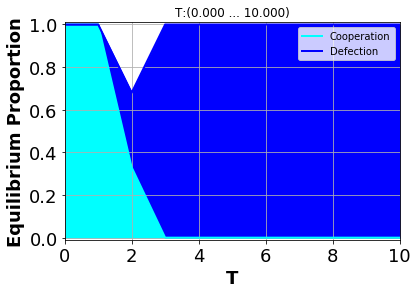

In [6]:
s = VariedGame(PD,WrightFisher)
s.vary(game_kwargs={'T':[0,10,10]},num_gens=100,num_iterations=100,parallelize=True,graph=dict(area=True,options=['smallfont']))

### Contour plots varying two parameters

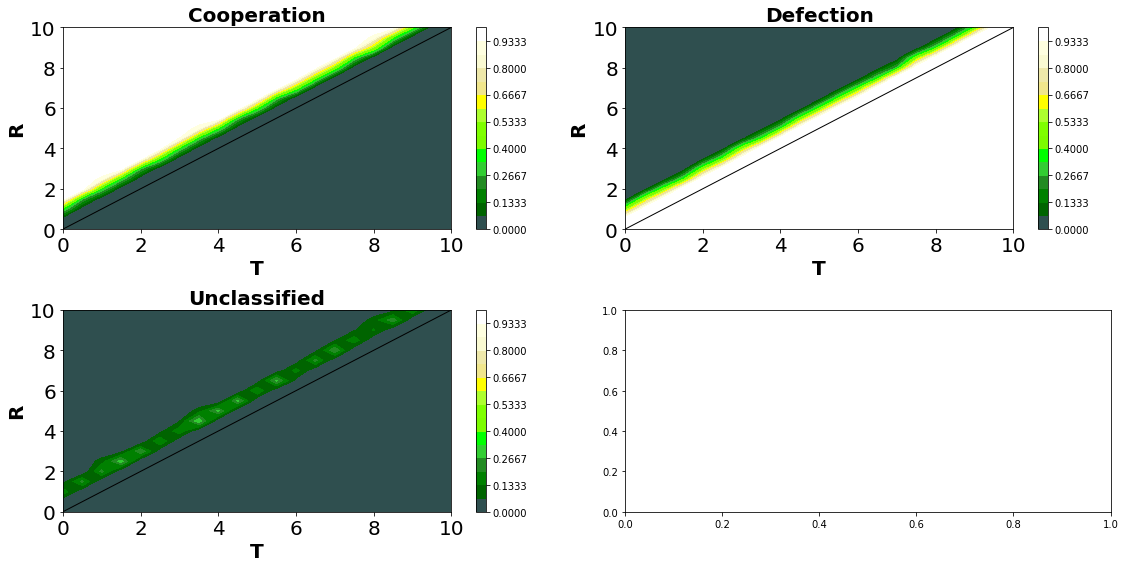

In [7]:
svaried = VariedGame(PD, WrightFisher)
svaried.vary_2params('R', (0, 10, 20), 'T', (0, 10, 20), num_iterations=50, \
    num_gens=100, graph=dict(type='contour', lineArray=[(0, 10, 0, 10)]))

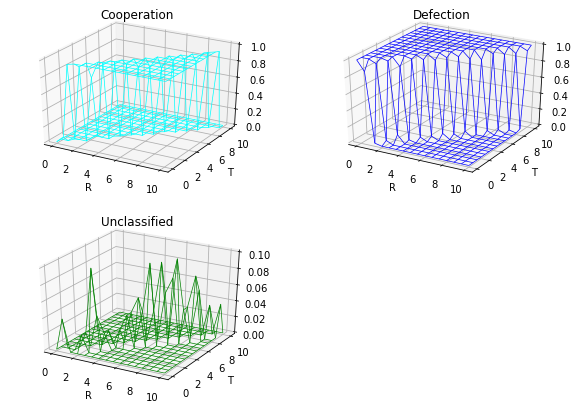

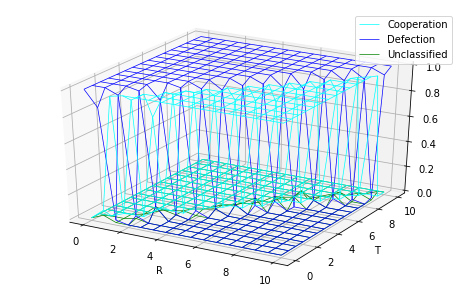

In [3]:
svaried = VariedGame(PD, WrightFisher)
svaried.vary_2params('R', (0, 10, 15), 'T', (0, 10, 15), num_iterations=50, \
    num_gens=100, graph=dict(type='3d', lineArray=[(0, 10, 0, 10)]))

## Group Selection
### Varying the number of groups keeping total population size fixed

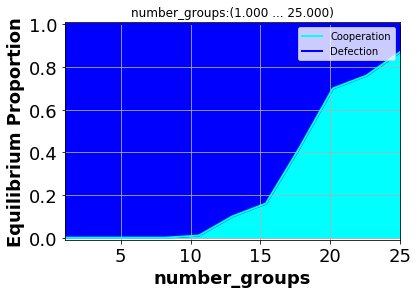

In [13]:
sw = VariedGame(PD, WrightFisher, dynamics_kwargs={'rate':0.2})
sw.vary(dynamics_kwargs={'number_groups':[1,25,10]},num_gens=100,num_iterations=100,parallelize=True,graph=dict(area=True,options=['smallfont']))

## Conformity
### Varying the bias strength

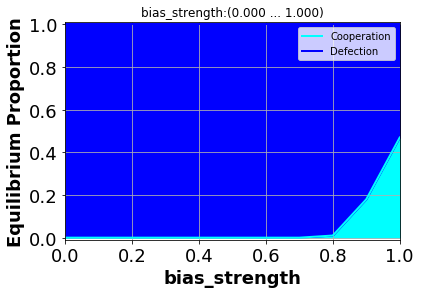

In [18]:
# Changing bias scale = 2 in the above Prisoner's Dilemma game
sw = VariedGame(PD,WrightFisher)
sw.vary(game_kwargs={'bias_strength':[0,1,10]},num_gens=100,num_iterations=100,parallelize=True,graph=dict(area=True,options=['smallfont']))